In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import cPickle

import re
import numpy as np
import scipy.interpolate as scinterpolate
import matplotlib.pyplot as plt

from ipywidgets import interact
from scipy import signal


In [2]:
def interpolate(x, y, dt):
    x = np.array(x)
    y = np.array(y)

    f = scinterpolate.interp1d(x, y, kind='linear')

    newx = np.arange(x.min(), x.max(),step=dt)
    newy = f(newx)
    
    return newx, newy

In [79]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
 nyq = 0.5 * fs
 low = lowcut / nyq
 high = highcut / nyq
 b, a = butter(order, [low, high], btype='band')
 return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
   b, a = butter_bandpass(lowcut, highcut, fs, order=order)
   y = lfilter(b, a, data)
   return y

In [270]:
def run(wavelet="cgau5", scale_low=3, scale_high=32):

    fig_width = 27
    
    with open('/home/justas/Repositories/OlfactoryBulb/soma_vs.pkl') as f:
        vs = cPickle.load(f)
        
    i = 0
    plt.subplots(figsize=(fig_width, 10))
    for cell, t, v in vs:
        if 'MC' in cell:
            col = 'b'
        if 'TC' in cell:
            col = 'y'
        if 'GC' in cell:
            col = 'g--'
        plt.plot(t,np.array(v)+i,col,label=cell)
        i += 100
    
    plt.xticks(np.arange(min(t), max(t)+1, 100.0))
    plt.show()

    dt = 0.1 # ms
    with open('/home/justas/Repositories/OlfactoryBulb/lfp.pkl') as f:
        t, y = cPickle.load(f)
        t = np.array(t)
        y = np.array(y)
        t, y = interpolate(t,y, dt)

    plt.subplots(figsize=(fig_width, 5))
    plt.plot(t,y*1000)    
    
    # Band pass filter 20-200Hz
    y = butter_bandpass_filter(y, 20, 200, 1/dt*1000, order=4)
    
    
    keep = np.where(t > 0*1000)
    t = np.array(t)[keep]
    y = np.array(y)[keep]
    
    plt.plot(t,y*1000+100)    
    #plt.xlim((1000,3400))
    plt.show()
    
    #Fourier spectrogram
    f, tff, Sxx = signal.spectrogram(y, 1/dt*1000, nperseg=256, scaling='spectrum', mode='magnitude')
    plt.subplots(figsize=(fig_width, 5))
    #plt.pcolormesh(tff*1000, f, Sxx)
    plt.contourf(tff*1000, f, np.log(1+Sxx), 13)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [msec]')
    plt.ylim((10,250))
    plt.show()
    
    
    
    # Wavelet range
    scales = np.linspace(scale_low/dt, scale_high/dt, 50)      # 150-19 Hz
    #scales = np.arange(4,512,1)     # 150-19 Hz
    
    cfs, frequencies = pywt.cwt(y, scales, wavelet, 0.0001)
    #frequencies *= (10000) # ms -> Hz    
    power = np.log(1+abs(cfs))
    
    plt.subplots(figsize=(fig_width, 5))
    plt.contourf(t, frequencies, power, 13)
    plt.show()
    
    plt.subplots(figsize=(150, 5))
    plt.contourf(t, frequencies, power, 13)
    plt.xticks(np.arange(min(t), max(t)+1, 50.0))
    plt.show()

    print(wavelet, 'Wavelet frequencies', frequencies[0],frequencies[-1], 'Hz')

#run('cgau5')

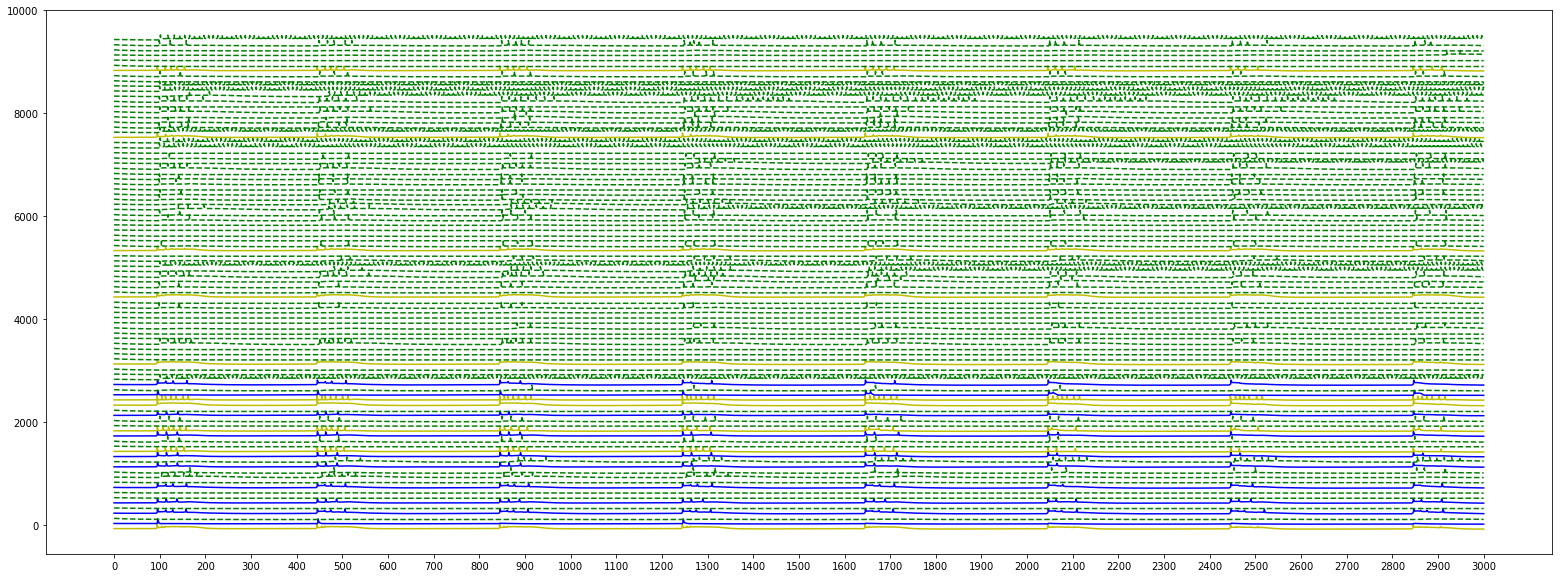

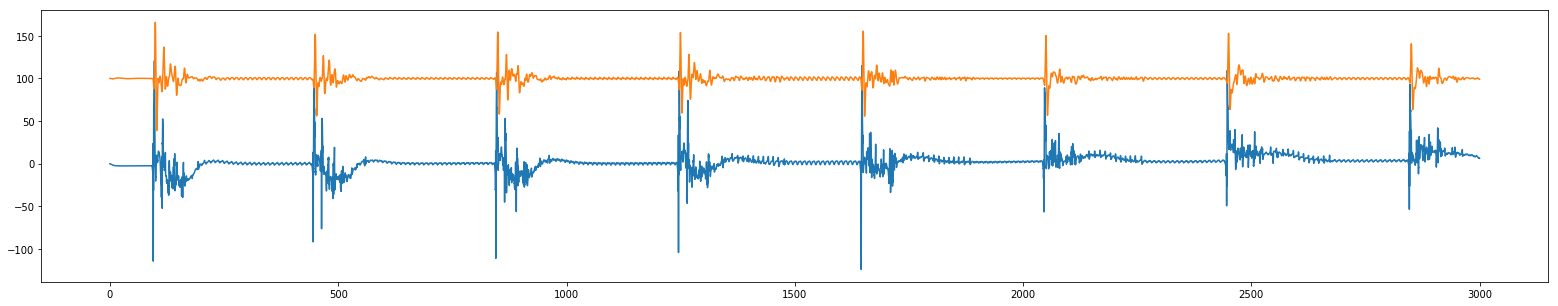

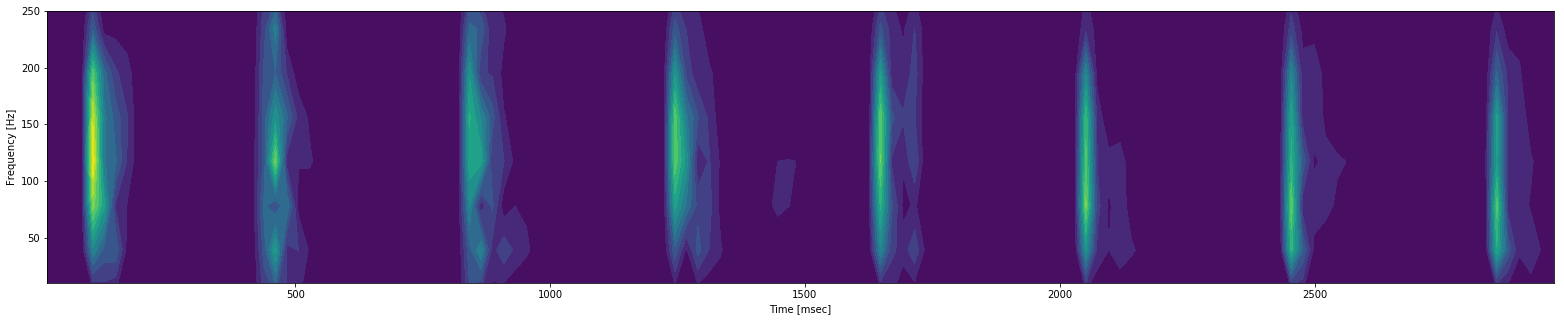

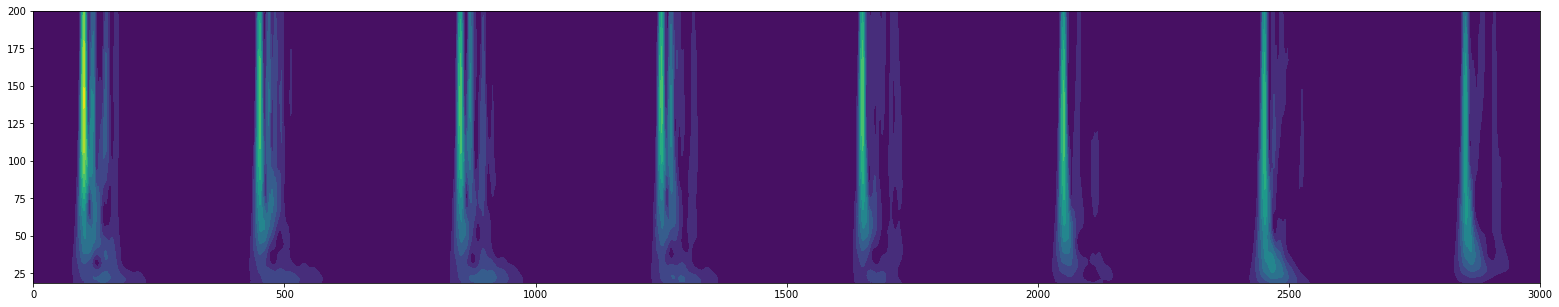

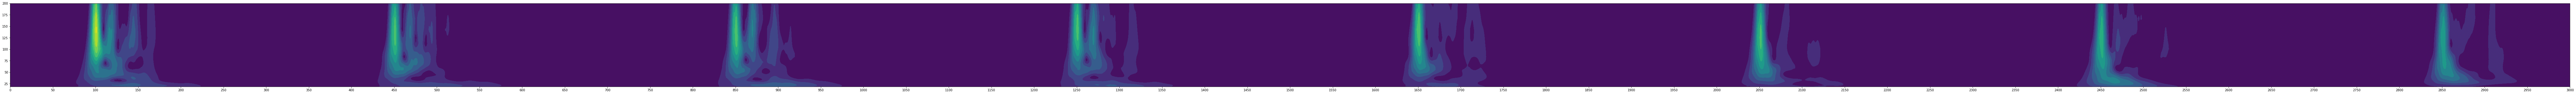

('cgau5', 'Wavelet frequencies', 200.0, 18.75, 'Hz')


In [278]:
run(wavelet='cgau5')